In [39]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Loading data
file_path = Path("Resources/crypto_data.csv")
df_crypto = pd.read_csv(file_path)
df_crypto.count()

Unnamed: 0         1252
CoinName           1252
Algorithm          1252
IsTrading          1252
ProofType          1252
TotalCoinsMined     744
TotalCoinSupply    1252
dtype: int64

In [3]:
len(df_crypto)

1252

In [4]:
df_crypto.tail()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000
1251,PUNK,SteamPunk,PoS,False,PoS,NaN,40000000


In [5]:
#drop the rows for coins which are not trading
df_crypto.drop(df_crypto.loc[df_crypto['IsTrading']=='False'].index, inplace=True)

In [6]:
#drop the NULL rows
df_crypto.dropna(inplace=True)

In [7]:
df_crypto.head(20)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000
10,DASH,Dash,X11,True,PoW/PoS,9.031294e+06,22000000
11,XMR,Monero,CryptoNight-V7,True,PoW,1.720114e+07,0
12,ETC,Ethereum Classic,Ethash,True,PoW,1.133597e+08,210000000


In [8]:
# dropping the column coinname
df_crypto.drop("CoinName", 1, inplace=True)

In [12]:
df_crypto.head()

,Unnamed: 0,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,True,PoW,1.792718e+07,21000000


In [30]:
#find the values names for ProofType
df_crypto['ProofType'].unique()

array(['PoW/PoS', 'PoW', 'PoS', 'PoC', 'PoS/PoW/PoT', 'PoST', 'PoW/nPoS',
       'PoS/PoW', 'dPoW/PoW', 'PoW/PoW', 'DPoS', 'TPoS', 'PoW/PoS ',
       'Proof of Authority', 'PoW and PoS', 'POBh', 'PoW + Hive', 'PoA',
       'HPoW', 'Zero-Knowledge Proof', 'DPOS', 'Pos', 'POS / MN',
       'Proof of Trust', 'DPoC', 'LPoS', 'DPoW', 'PoS/LPoS'], dtype=object)

In [45]:
#Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero
df_crypto = df_crypto.loc[df_crypto['TotalCoinsMined'] > 0] 
df_crypto

,Unnamed: 0,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,1337,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1242,GAP,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,True,PoW,7.296538e+06,21000000
1247,XBC,Scrypt,True,PoS,1.283270e+05,1000000


In [46]:
 # This is one way to encode string values into numeric values
df_crypto_dummies=pd.get_dummies(df_crypto)
df_crypto_dummies

,IsTrading,TotalCoinsMined,Unnamed: 0_1337,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,True,4.199995e+01,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,True,1.055185e+09,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,True,2.927942e+10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,True,1.792718e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,True,1.076842e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,True,1.493105e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,True,9.802226e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,True,7.296538e+06,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247,True,1.283270e+05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
print(df_crypto_dummies.columns)

Index(['IsTrading', 'TotalCoinsMined', 'Unnamed: 0_1337', 'Unnamed: 0_1CR',
       'Unnamed: 0_404', 'Unnamed: 0_42', 'Unnamed: 0_8BIT', 'Unnamed: 0_AAC',
       'Unnamed: 0_ABJ', 'Unnamed: 0_ABS',
       ...
       'TotalCoinSupply_91388946', 'TotalCoinSupply_92000000000',
       'TotalCoinSupply_9354000', 'TotalCoinSupply_9507271',
       'TotalCoinSupply_9736000', 'TotalCoinSupply_98000000',
       'TotalCoinSupply_98100000000', 'TotalCoinSupply_990000000000',
       'TotalCoinSupply_999481516', 'TotalCoinSupply_9999999'],
      dtype='object', length=973)


The number of columns increased from 6 to 973 after dummies

In [43]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
scaler = StandardScaler().fit(df_crypto_dummies)
df_crypto_scaled = scaler.transform(df_crypto_dummies)
df_crypto_scaled

744

In [48]:
# Applying PCA to reduce dimensions 

pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(df_crypto_scaled)
pca_array = pca.explained_variance_ratio_
len(pca_array)
# Transform PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(
    data=crypto_pca
)
df_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,612,613,614,615,616,617,618,619,620,621
0,-0.226463,-0.077701,1.719831e-15,0.019510,1.966752,-0.417431,-0.041338,-0.406413,0.404728,-1.885833,...,-0.000000e+00,0.000000e+00,-0.000000e+00,4.232679e-140,0.000000e+00,-0.000000e+00,-9.501703e-48,0.000000e+00,0.000000e+00,-0.000000e+00
1,-0.203217,-0.078763,2.985808e-15,0.012480,1.965332,-0.417300,-0.041346,-0.406797,0.405596,-1.888897,...,-2.962751e-15,1.889310e-14,4.636745e-15,1.500178e-15,-3.422437e-15,2.151252e-15,-2.316846e-15,-1.042358e-15,-3.696422e-15,1.867309e-15
2,-0.065033,-0.057223,1.784724e-16,-0.029533,1.166974,-0.220653,-0.268778,-0.350833,0.156852,-0.705800,...,3.438764e-01,-9.538861e-01,-6.584613e-01,-6.583672e-01,2.059000e-01,-1.091170e+00,-6.857336e-01,-1.283785e+00,8.657043e-02,-2.396172e+00
3,0.519819,-0.007571,-1.374780e-14,-0.161899,3.123124,-0.534993,-0.499652,-0.546339,0.439548,-1.279833,...,-2.878806e-14,6.439434e-15,-1.420463e-15,-5.445110e-15,4.100108e-15,-1.822928e-15,-2.900113e-15,-9.588128e-16,1.273238e-14,5.445110e-16
4,-0.254537,-0.163540,3.089805e-15,-0.000967,-1.988130,0.234368,-0.016937,-0.110831,-0.148440,0.083464,...,9.830599e-01,-5.684849e-01,2.792978e+00,-1.590557e+00,-9.727851e-01,4.790325e-01,-1.072509e-02,2.152400e-01,8.660644e-01,-1.402128e+00


The features have changed to 622 now

In [50]:
from sklearn.manifold import TSNE
# Initialize t-SNE model
tsne = TSNE(learning_rate=800, n_iter=2000)
# Reduce dimensions
tsne_features = tsne.fit_transform(df_crypto_pca)
tsne_features.shape

(744, 2)

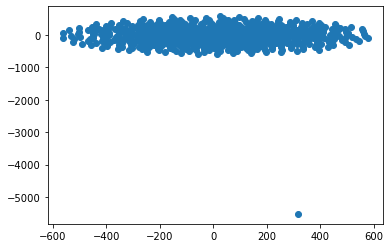

In [51]:
# Preparing to plot the dataset
# The first column of transformed features
df_crypto_pca['0'] = tsne_features[:,0]
# The second column of transformed features
df_crypto_pca['1'] = tsne_features[:,1]



# Visualize the clusters
import matplotlib.pyplot as plt
plt.scatter(df_crypto_pca['0'], df_crypto_pca['1'])
plt.show()

# Cluster analysis with K-means

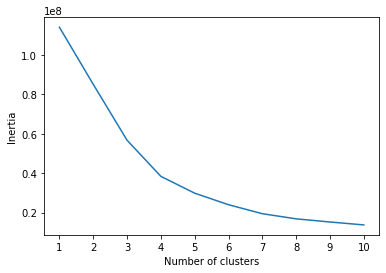

In [52]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

K=4 is the “elbow” point where the decrease in inertia begins to slow downs.

In [55]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(df_crypto_pca)

# Predict clusters
predictions = model.predict(df_crypto_pca)

# Add the predicted class columns
df_crypto_pca["class"] = model.labels_
df_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,0,1,class
0,-0.226463,-0.077701,1.719831e-15,0.019510,1.966752,-0.417431,-0.041338,-0.406413,0.404728,-1.885833,...,4.232679e-140,0.000000e+00,-0.000000e+00,-9.501703e-48,0.000000e+00,0.000000e+00,-0.000000e+00,-65.249992,-352.454865,0
1,-0.203217,-0.078763,2.985808e-15,0.012480,1.965332,-0.417300,-0.041346,-0.406797,0.405596,-1.888897,...,1.500178e-15,-3.422437e-15,2.151252e-15,-2.316846e-15,-1.042358e-15,-3.696422e-15,1.867309e-15,-301.174683,-274.413757,0
2,-0.065033,-0.057223,1.784724e-16,-0.029533,1.166974,-0.220653,-0.268778,-0.350833,0.156852,-0.705800,...,-6.583672e-01,2.059000e-01,-1.091170e+00,-6.857336e-01,-1.283785e+00,8.657043e-02,-2.396172e+00,-93.769737,23.501598,0
3,0.519819,-0.007571,-1.374780e-14,-0.161899,3.123124,-0.534993,-0.499652,-0.546339,0.439548,-1.279833,...,-5.445110e-15,4.100108e-15,-1.822928e-15,-2.900113e-15,-9.588128e-16,1.273238e-14,5.445110e-16,-316.048584,-197.030380,0
4,-0.254537,-0.163540,3.089805e-15,-0.000967,-1.988130,0.234368,-0.016937,-0.110831,-0.148440,0.083464,...,-1.590557e+00,-9.727851e-01,4.790325e-01,-1.072509e-02,2.152400e-01,8.660644e-01,-1.402128e+00,92.900246,-30.522736,1


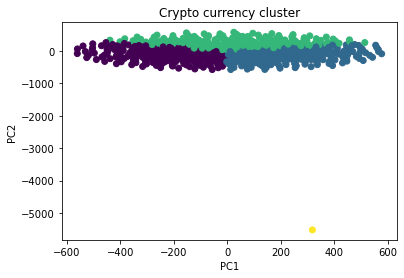

In [56]:
# Visualize the clusters
plt.scatter(x=df_crypto_pca['0'], y=df_crypto_pca['1'], c=df_crypto_pca['class'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Crypto currency cluster')
plt.show()

Based on the dataset we can say that cryptocurrencies be clustered.
From the graph, it is clear that we can cluster cryptocurrencies in 3 groups.